In [346]:
# import libraries
# data wrangling
import pandas as pd
# visualization
import matplotlib.pyplot as plt
# algorithm
from sklearn.cluster import DBSCAN

In [347]:
# import data
data = pd.read_csv("Corrupted1_20_small.csv")

In [348]:
data

,Unnamed: 0,Mystery_Data_X,Mystery_Data_Y,Modified
0,0,115.747058,146.258981,False
1,1,129.212070,142.929480,False
2,2,107.222577,131.493558,False
3,3,206.682922,NaN,True
4,4,194.050422,518.931126,True
...,...,...,...,...
9995,9995,140.994165,223.607553,False
9996,9996,172.932323,151.148858,False
9997,9997,197.636441,858.693282,True
9998,9998,127.702725,90.815316,False


In [349]:
data = data.fillna(0)

In [350]:
# input data
df = data[["Mystery_Data_X", "Mystery_Data_Y"]]

In [351]:
# model specification
model = DBSCAN(eps = 40).fit(df)

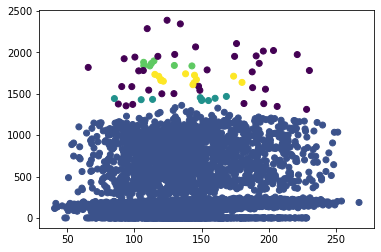

In [352]:
# visualize outputs
colors = model.labels_
plt.scatter(data["Mystery_Data_X"], data["Mystery_Data_Y"], c = colors)


In [353]:
# outliers dataframe
outliers = df[model.labels_ == -1]
print(outliers)

      Mystery_Data_X  Mystery_Data_Y
336       190.521307     1956.018490
1114      174.482629     1950.600423
1199      109.503769     2285.234360
1258      221.052025     1972.203741
2122      187.879521     1572.845769
2207      195.826858     2014.334913
2224      154.050514     1787.089073
2364       98.066878     1585.192206
2397      145.480929     2064.730878
2699      197.426610     1554.044697
3096      175.906257     2105.150377
3309      192.778857     1866.111248
3432      203.395291     2021.175907
3511      129.955469     1973.843823
3837      228.006929     1310.533361
3854       65.645825     1817.318418
3949      181.454622     1381.192046
4839      100.353770     1941.751016
4977       90.572853     1585.975194
4995      129.381431     1500.864752
5134      117.428369     1950.793031
5856      147.685680     1589.902713
6097      110.631304     1543.067825
6372      103.188164     1775.549530
6623      230.090005     1779.693277
7061       92.363756     1922.069600
7

In [354]:
outliers = outliers.index

In [355]:
arr = df.index.isin(outliers)

In [356]:
arr

array([False, False, False, ..., False, False, False])

In [357]:
data = pd.DataFrame(arr, columns =['Model'])

In [358]:
data

,Model
0,False
1,False
2,False
3,False
4,False
...,...
9995,False
9996,False
9997,False
9998,False


In [359]:
data.to_csv('check.csv')

In [360]:
import pandas as pd

In [361]:
read = pd.read_csv('Corrupted1_20_small_DBSCAN.csv')
read

,Unnamed: 0,Mystery_Data_X,Mystery_Data_Y,Modified,Model,CHECKING
0,0,115.747058,146.258981,False,False,True
1,1,129.212070,142.929480,False,False,True
2,2,107.222577,131.493558,False,False,True
3,3,206.682922,NaN,True,False,False
4,4,194.050422,518.931126,True,True,True
...,...,...,...,...,...,...
9995,9995,140.994165,223.607553,False,True,False
9996,9996,172.932323,151.148858,False,True,False
9997,9997,197.636441,858.693282,True,True,True
9998,9998,127.702725,90.815316,False,True,False


In [362]:
l = len(read['CHECKING'])
l

10000

In [363]:
count = 0

In [364]:
for i in range(0,l):
  if(read['CHECKING'][i] == True):
    count = count + 1;

In [365]:
count

3960

In [366]:
accuracy = count/l

In [367]:
accuracy

0.396

In [368]:
count1 = 0
count2 = 0

In [369]:
for i in range(0,l):
  if(read['Modified'][i] == True):
    count2 = count2 + 1
    if(read['Model'][i] == True):
      count1 = count1 + 1

In [370]:
count1

1780

In [371]:
count2

2217

In [372]:
acc = count1/count2

In [373]:
acc

0.8028867839422643

In [374]:
count6 = 0
count5 = 0
for i in range(0,l):
  if(read['Model'][i] == True):
      count6 = count6 + 1
for i in range(0,l):
  if(read['Modified'][i] == True):
    if(read['Model'][i] == True):
      count5 = count5 + 1 
precision = count5/count6
precision  

0.24109440606799404

In [375]:
count7 = 0
count8 = 0
for i in range(0,l):
  if(read['Modified'][i] == False):
    count8 = count8 + 1
    if(read['Model'][i] == False):
      count7 = count7 + 1
sensitivity = count7/count8    
sensitivity

0.28009764872157267

In [376]:
f1_score = 2*acc*precision/(acc+precision)
f1_score

0.37083333333333335

In [377]:
import numpy as np

In [378]:
read = read.fillna(0)

In [379]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(read)
X_pca = pca.transform(read)

In [380]:
lofs_index = np.where(model.labels_==1)

In [381]:
lofs_index

(array([ 312, 1143, 1996, 2250, 3514, 4969, 6341, 7480, 9901]),)

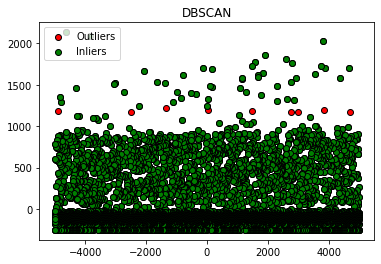

In [383]:
lofs_index = np.where(model.labels_!=1)
values = X_pca[lofs_index]
plt.title("DBSCAN")
plt.scatter(X_pca[:,0], X_pca[:,1], color='r',edgecolors='black',label="Outliers")
plt.scatter(values[:,0],values[:,1], color='green', edgecolors='black',label="Inliers")
plt.legend(loc="upper left")
plt.show()